In [199]:
import numpy as np
import pandas as pd
import mne
import pyeeg

In [200]:
data = mne.io.read_raw_edf('eeg10.edf', preload=True)

Extracting EDF parameters from /home/anjali/Desktop/Mehnat/BTP2/eeg10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1389311  =      0.000 ...  5426.996 secs...


In [202]:
pyeeg.dfa(df)

1.321688988381152

In [201]:
df = data.to_data_frame()
type(df)

Converting "time" to "<class 'numpy.int64'>"...


pandas.core.frame.DataFrame

In [195]:
df_np = data[:][0]
df_np.dtype
df_np.shape

(21, 1389312)

In [14]:
band = [0.5, 4, 7]
for f in range(0, len(band)-1):
    freq = float(band[f])
    print(freq)

0.5
4.0


In [54]:
int(0.5)
(1/256 * 21)

0.08203125

In [74]:
C = np.fft.fftn(df_np)
sum(C[0:10]).shape

(1389312,)

In [67]:
int(4/256 * 1389312)

21708

In [80]:
def power(X, Band, Fs):
    C = np.fft.fftn(X)
    C = abs(C)
    Power = []
    for i in range(len(Band) - 1):
        Power.append([])
    
    for Freq_Index in range(0,len(Band)-1):
        Freq = int(Band[Freq_Index])
        Next_Freq = int(Band[Freq_Index+1])
        Power[Freq_Index] = sum(C[int(Freq/Fs*X.shape[1]):int(Next_Freq/Fs*X.shape[1])])
        # Power[Freq_Index] = sum(C[floor(Freq/Fs*len(X)):floor(Next_Freq/Fs*len(X))])
    Power_Ratio = Power/sum(Power)
    return Power, Power_Ratio

In [117]:
np.fft.fftn(df_np).shape

(21, 1389312)

In [119]:
import matplotlib.pyplot as plt
import math
Fs=256
N= df_np.shape[1]
xdft = np.fft.fftn(df_np)
xdft = xdft[1 : (int)(N/2)+1];
xdft = abs(xdft)
psdx = (1/(Fs*N)) * xdft * xdft;
psdx[2:N-1] = 2 * psdx[2:N-1];
freq = range(0, int(Fs/N), int(Fs/2));
# plt.plot(freq, 10*math.log10(psdx))
xdft.shape

(20, 1389312)

In [81]:
power(df, [0.5,4,7,12,30], 256)

ValueError: setting an array element with a sequence.

In [197]:
# df = df_np[:,:(20*256)]
df = df_np
df.shape
df.shape[1]

1389312

(21, 694657)
0.378980376763
0.0657166284445
0.0409852791645
0.0236787141759
0.0123752387158


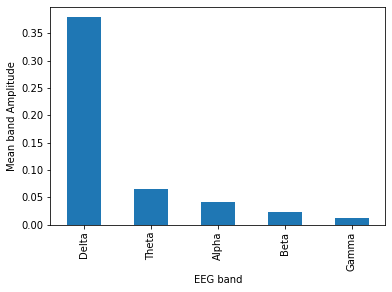

In [198]:
import numpy as np

fs = 256                                # Sampling rate (512 Hz)
data = df # 2 sec of data b/w 0.0-100.0

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))
print(fft_vals.shape)

# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(data.shape[1], 1.0/fs)

# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the mean of the fft amplitude for each EEG band
eeg_band_fft = dict()
for band in eeg_bands:  
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                       (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[:,freq_ix])

# Plot the data (using pandas here cause it's easy)
import pandas as pd
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("EEG band")
ax.set_ylabel("Mean band Amplitude")

for band in eeg_bands:
    print(eeg_band_fft[band])